# C2ST Program Survey Evaluation Formatting Notebook


## 1. Purpose

- This Notebook was created for the purpose of assisting C2ST with reformatting their Program Survey Evaluation exports from C2ST's Conferences I/O application.

## 2. Modifications

- Modifications can be made to any of the cells in this notebook.
- If a modification is necessary, it is recommended to make a copy of this notebook and test modifications to ensure things run as expected before updating the main copy. 
  - This helps preserve each notebook version so revisions are easily identifiable in the revision history.
  - Revision history can be found under "File" in the main taskbar.
- Please note that cells with images include very large amounts of code and tend to lag slightly when making edits. Text is written in between each image so it may be difficult to locate specific numbers in those cells containg images. A lot of scrolling is necessary to make modifications to these cells.
  - this will not be the case with cells containing python code or cells containing text only.

## 3. Authors

This notebook was authored by Samantha Ryan-Lee, with contributions from Nick Capaldini (Section C) and Shiyu Guo (Section I). 

# Instructions and Steps

In [1]:
import pandas as pd

## A. Load Excel Files into the Notebook

1. Select the folder icon from the taskbar along the left vertical of the notebook

2. Select the upload file icon from the top left of the files taskbar

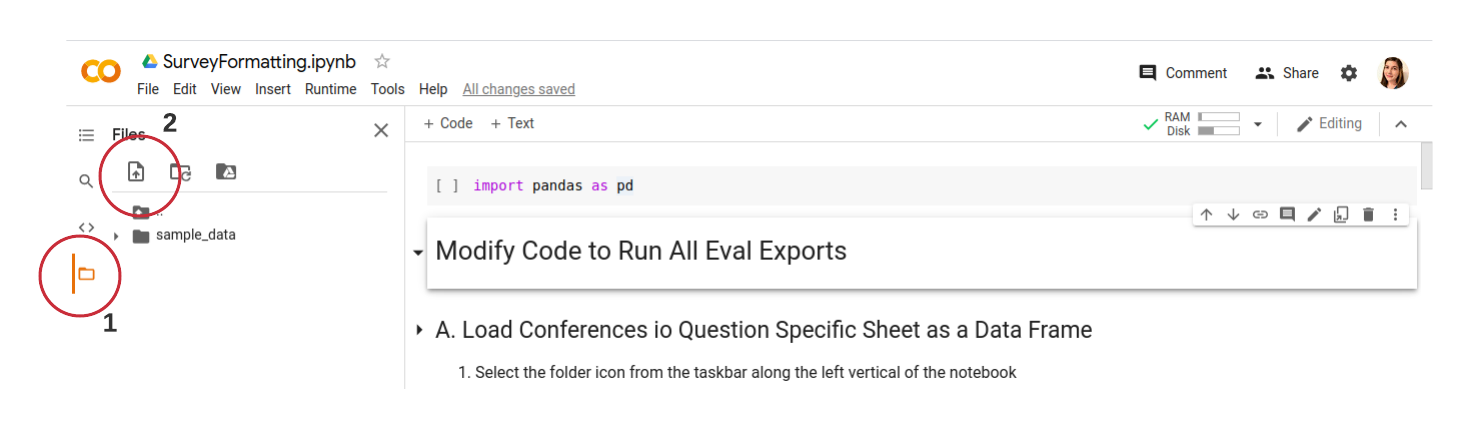

3. Select the file from your local file system.

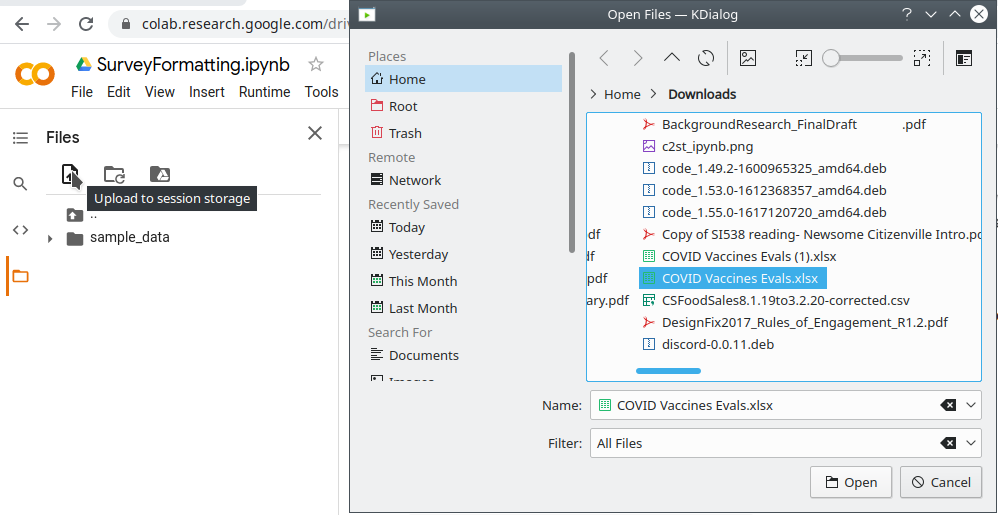

4. A warning will display. This just means that any files uploaded to the Notebook's file system will be removed when the Notebook is closed. Each time this notebook is opened for use, files will need to be uploaded for it to run. Select "OK" to continue.

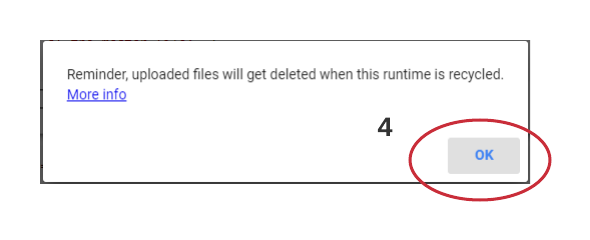

5. The file should now be displayed in the notebook's files 

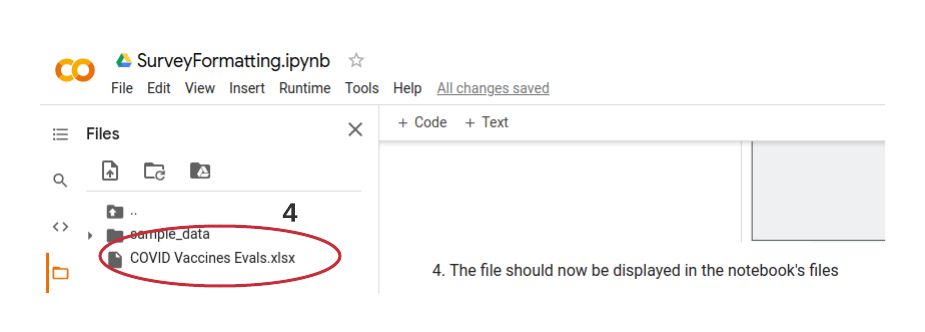

6. Repeat this process for the master survey evaluations file that needs to be updated

## B. Run the Notebook

1. Select "Runtime" from the taskbar

2. Select "Run all"

3. Alternatively, you can use the shortcut Ctrl+F9 (This shortcut may be different for Mac OS)

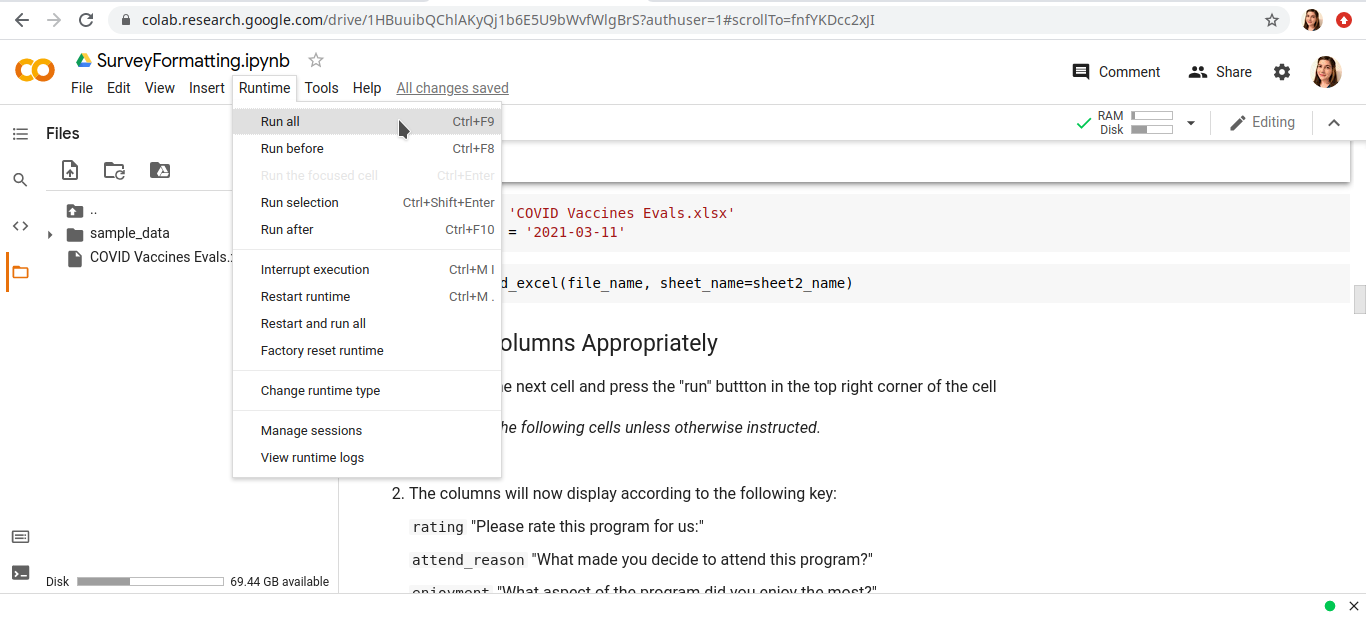


4. A warning will display. This just means that Google did not write this notebook. Not all notebooks are safe to run. This one is. Please select "Run Anyway"

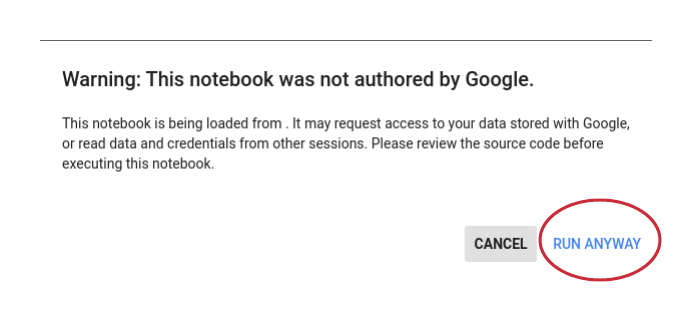

## C. Input File Names

1. Input the name of the Conferences I/O Excel file you wish to format and use the enter or return key to move to the next input. 

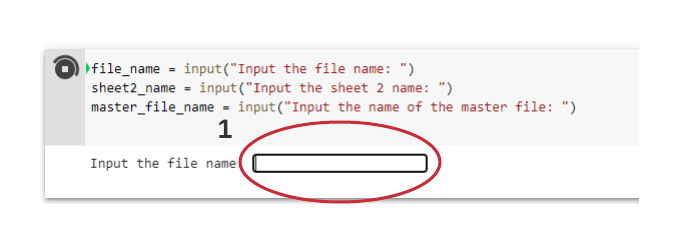

2. Input the sheet name of second sheet from the Excel export from Conferences I/O (the sheet containing question specific data) and use the enter or return key to move to the next input.

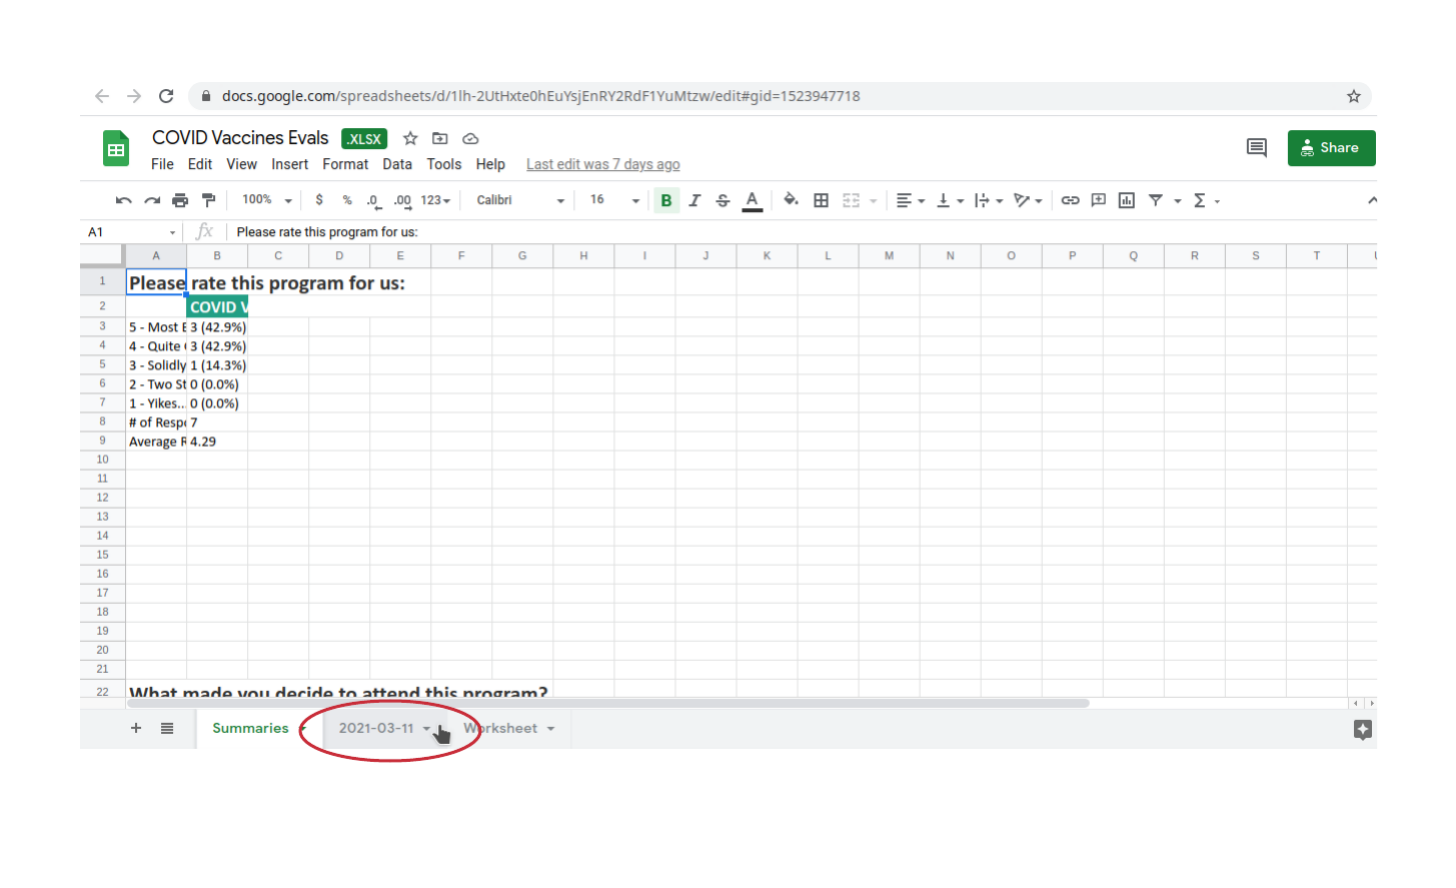


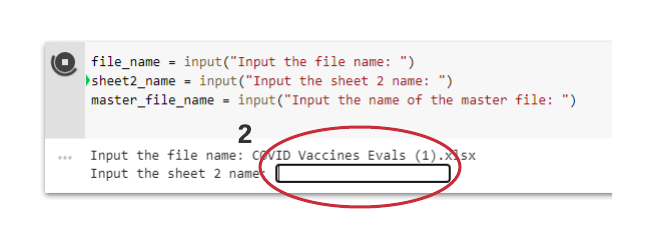

3. Input the name of the master file (Containing all survey evaluations) you wish to add the current file to and use the enter or return key to move to the next input.

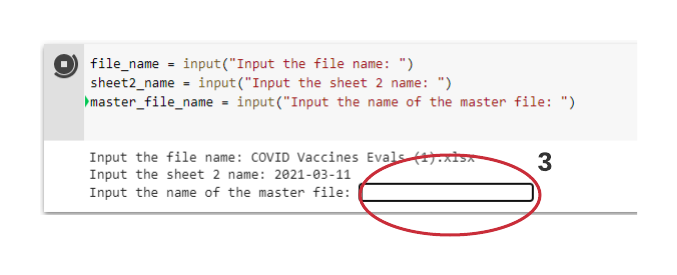

In [2]:
file_name = input("Input the file name: ")
sheet2_name = input("Input the sheet 2 name: ")
master_file_name = input("Input the name of the master file: ")

Input the file name: S and S 4.2.2021 Evals - No Emails.xlsx
Input the sheet 2 name: 2021-04-02
Input the name of the master file: Program Evals Master3.xlsx


In [3]:
df = pd.read_excel(file_name, sheet_name=sheet2_name)

## D. Rename Columns Appropriately

1. The columns will now display according to the following key:

    `rating` "Please rate this program for us:"

    `attend_reason` "What made you decide to attend this program?"

    `enjoyment` "What aspect of the program did you enjoy the most?"

    `topic_agreement` "Please indicate your level of agreement with the following statement: This program improved my understanding of..."

    `find_out` "How did you hear about this program?"

    `prev_attend` "Had you ever attended a C2ST program before this one?"

    `zipcode` "In what ZIP code is your home located..."

    `feedback` "Please let us know any other feedback you might have:"

    `email` "Please input your email to be entered into a raffle for a virtual, small-group meeting with a scientist:"

    `timestamp` "Submission Timestamp": The time and date the response was recorded

In [4]:
response_cols = {'Please rate this program for us:': 'rating',
                 'What made you decide to attend this program?': 'attend_reason', 
                 'What aspect of the program did you enjoy the most?': 'enjoyment',
                 'Please indicate your level of agreement with the following statement: This program improved my understanding of COVID vaccines and the science supporting vaccines.': 'topic_agreement',
                 'How did you hear about this program?': 'find_out',
                 'Had you ever attended a C2ST program before this one?': 'prev_attend',
                 'In what ZIP code is your home located? (enter 5-digit ZIP code; for example, 00544 or 94305)': 'zipcode',
                 'Please let us know any other feedback you might have:': 'feedback',
                 'Please input your email to be entered into a raffle for a virtual, small-group meeting with a scientist:': 'email',
                 'Submission Timestamp': 'timestamp'}

eval_df = df[['Unnamed: 4',	'Unnamed: 5',	'Unnamed: 6',	'Unnamed: 7',	'Unnamed: 8',	'Unnamed: 9',	'Unnamed: 10',	'Unnamed: 11',	'Unnamed: 12',	'Unnamed: 13']].copy()
eval_df.rename(columns={
    "Unnamed: 4":	'Please rate this program for us:', 
    "Unnamed: 5":'What made you decide to attend this program?',
    "Unnamed: 6":'What aspect of the program did you enjoy the most?',
    "Unnamed: 7": 'Please indicate your level of agreement with the following statement: This program improved my understanding of COVID vaccines and the science supporting vaccines.',
    "Unnamed: 8":'How did you hear about this program?',
    "Unnamed: 9":'Had you ever attended a C2ST program before this one?',
    "Unnamed: 10":'In what ZIP code is your home located? (enter 5-digit ZIP code; for example, 00544 or 94305)',
    "Unnamed: 11":'Please let us know any other feedback you might have:',
    "Unnamed: 12":'Please input your email to be entered into a raffle for a virtual, small-group meeting with a scientist:',
    "Unnamed: 13": 'Submission Timestamp'
}, inplace=True)
eval_df.rename(columns=response_cols, inplace=True)
eval_df.drop(0, inplace=True)

## E. Drop Non-Responses From Data Set

1. Non-Responses are rows containing `NaN` values under `timestamp`

2. After running the next cell, the recorded responses are displayed.


In [5]:
response_df = eval_df.dropna(axis=0,subset=['timestamp'], how='any').copy()

In [6]:
response_df['program_date'] = sheet2_name
response_df

,rating,attend_reason,enjoyment,topic_agreement,find_out,prev_attend,zipcode,feedback,email,timestamp,program_date
1,5 - Most Excellent,"The fantastic speaker, The interesting topic","Outstanding Speaker, Impressive Research/Topic",Somewhat agree,Word of Mouth,No,37669,NaN,NaN,2021-04-03 6:31pm,2021-04-02
2,3 - Solidly Medium,The fantastic speaker,Panelists/Discussion,Somewhat agree,C2ST Email,Yes,60617,NaN,NaN,2021-04-05 12:14pm,2021-04-02


## F. Encode Single String Response Values Numerically

1. Values under `rating` are encoded according to the following key:

    `rating` = `5`
  
  "5 - Most Excellent"

    `rating` = `4`
  
  "4 - Quite Good"

    `rating` = `3`
  
  "3 - Solidly Medium"

    `rating` = `2`
  
  "2 - "

    `rating` = `1`
  
  "1 - "

2. Values under `topic_agreement` are encoded according to the following key:

  `topic_agreement` = `4`

  "Strongly Agree"

  `topic_agreement` = `3`

  "Somewhat Agree"

  `topic_agreement` = `2`

  "Somewhat Disagree"

  `topic_agreement` = `1`

  "Strongly Disagree"
  

In [7]:
response_df.replace('5 - Most Excellent', 5, inplace=True)
response_df.replace('4 - Quite Good', 4, inplace=True)
response_df.replace('3 - Solidly Medium', 3, inplace=True)
response_df.replace('2 - Two Stars', 2, inplace=True)
response_df.replace('1 - Yikes...', 1, inplace=True)

In [8]:
response_df.replace('Strongly agree', 4, inplace=True)
response_df.replace('Somewhat agree', 3, inplace=True)
response_df.replace('Somewhat disagree', 2, inplace=True)
response_df.replace('Strongly disagree', 1, inplace=True)

## G. Encode Missing Feedback and Emails

1. Replace `NaN` values under `feedback` as "no feedback"

2. Replace `NaN` values under `email` as "no email"

3. Replace `NaN` values under `zipcode` as zeros

In [9]:
response_df.feedback.fillna('no comment', inplace=True)
response_df.email.fillna('no email', inplace=True)
response_df.zipcode.fillna(0, inplace=True)

## H. Create New Table for Select-All-That-Apply Responses

1. A new table is created containing columns that map to individual responses for the following columns containing comma separated values as a response:

  `attend_reason`
  
  `enjoyment`

  `find_out`

2. Each column in the new table maps to a possible selection, where values equal 1 if the respondant selected a particular option and values equal 0 if the respondant did not select a particular option.  For example:

  New Table "multiresponse_encoded" contains the following columns:

    `attend_speaker`
    
    `1` = Respondant selected "The fantastic speaker", 0 otherwise
      
    `attend_topic` 
    
    `1` = Respondant selected "The interesting topic", 0 otherwise
      
    `attend_schedule`

    `1` = Respondant selected "Schedule allowed for it", 0 otherwise
      
    `attend_impressive`	

    `1` = Respondant selected "Impressive Research/Topic", 0 otherwise
      
    `attend_growth`	

    `1` = Respondant selected "Personal growth", 0 otherwise
      
    `attend_venue`	

    `1` = Respondant selected "The cool venue", 0 otherwise
  
  `enjoyment_speaker`	
  
  `1` = Respondant selected "Outstanding Speaker", 0 otherwise
  
  `enjoyment_impressive`	
  
  `1` = Respondant selected " Impressive Research/Topic", 0 otherwise
  
  `enjoyment_qa`
  
  `1` = Respondant selected " Q&A", 0 otherwise
  
  `enjoyment_panel`	
  
  `1` = Respondant selected " Panelists/Discussion", 0 otherwise

  `enjoyment_venue`	
  
  `1` = Respondant selected " Unique Venue", 0 otherwise
  
  `find_out_word_mouth`	

  `1` = Respondant selected "Word of Mouth", 0 otherwise

  `find_out_email`	
  
  `1` = Respondant selected "C2ST Email", 0 otherwise
  
  `find_out_partner_org`

  `1` = Respondant selected "Partner/Other Organization", 0 otherwise

In [10]:
multiresponse_encoded = pd.DataFrame()

In [11]:
multiresponse_encoded['program_date'] = response_df.program_date.copy()

In [12]:
multiresponse_encoded['attend_speaker'] = response_df['attend_reason'].str.contains('The fantastic speaker', na=False)
multiresponse_encoded['attend_topic'] = response_df['attend_reason'].str.contains('The interesting topic', na=False)
multiresponse_encoded['attend_networking'] = response_df['attend_reason'].str.contains('Networking with others', na=False)
multiresponse_encoded['attend_growth'] = response_df['attend_reason'].str.contains('Personal growth', na=False)
multiresponse_encoded['attend_schedule'] = response_df['attend_reason'].str.contains('Schedule allowed for it', na=False)
multiresponse_encoded['attend_venue'] = response_df['attend_reason'].str.contains('The cool venue', na=False)
multiresponse_encoded['attend_other'] = response_df['attend_reason'].str.contains('Other', na=False)


In [13]:
multiresponse_encoded['enjoyment_speaker'] = response_df['enjoyment'].str.contains('Outstanding Speaker', na=False)
multiresponse_encoded['enjoyment_research'] = response_df['enjoyment'].str.contains(' Impressive Research/Topic', na=False)
multiresponse_encoded['enjoyment_qa'] = response_df['enjoyment'].str.contains(' Q&A', na=False)
multiresponse_encoded['enjoyment_discussion'] = response_df['enjoyment'].str.contains(' Panelists/Discussion', na=False)
multiresponse_encoded['enjoyment_networking'] = response_df['enjoyment'].str.contains('Reception/Networking', na=False)
multiresponse_encoded['enjoyment_venue'] = response_df['enjoyment'].str.contains(' Unique Venue', na=False)
multiresponse_encoded['enjoyment_everything'] = response_df['enjoyment'].str.contains('Everything was delightful', na=False)
multiresponse_encoded['enjoyment_other'] = response_df['enjoyment'].str.contains('Other', na=False)

In [14]:
multiresponse_encoded['find_out_email'] = response_df['find_out'].str.contains('C2ST Email', na=False)
multiresponse_encoded['find_out_social_media'] = response_df['find_out'].str.contains('C2ST Social Media Post', na=False)
multiresponse_encoded['find_out_c2st_website'] = response_df['find_out'].str.contains('C2ST Website', na=False)
multiresponse_encoded['find_out_eventbrite'] = response_df['find_out'].str.contains('Eventbrite', na=False)
multiresponse_encoded['find_out_partner_other'] = response_df['find_out'].str.contains('Partner/Other Organization', na=False)
multiresponse_encoded['find_out_word_of_mouth'] = response_df['find_out'].str.contains('Word of Mouth', na=False)

In [15]:
multiresponse_encoded.replace(True, 1, inplace=True)
multiresponse_encoded.replace(False, 0, inplace=True)

In [16]:
multiresponse_encoded

,program_date,attend_speaker,attend_topic,attend_networking,attend_growth,attend_schedule,attend_venue,attend_other,enjoyment_speaker,enjoyment_research,enjoyment_qa,enjoyment_discussion,enjoyment_networking,enjoyment_venue,enjoyment_everything,enjoyment_other,find_out_email,find_out_social_media,find_out_c2st_website,find_out_eventbrite,find_out_partner_other,find_out_word_of_mouth
1,2021-04-02,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2021-04-02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## I. Create New Table With Descriptive Statistics

1. Extracts columns with numerical values from responses table as `num_response_df`

2. Replaces "Yes" and "No" values from `prev_attend` column with 1 and 0 respectively 

3. Merges `num_response_df` columns with `multiresponse_encoding` columns to create a new table `combined_num_df`

4. Creates a new table named `descriptive_stats` to display a series of descriptive statistics including:
 
  total responses or `count`
  
  average or `mean`
  
  standard deviation or `std`

  minimum value or `min`
  
  percentiles (`25%`, `50%`, `75%`)

  maximum value or `max`

  summed responses or `sum`

  relative frequency or `rel_freq`

In [17]:
num_response_df = response_df[['rating', 'topic_agreement', 'prev_attend']].copy()

In [18]:
num_response_df.prev_attend.replace('Yes', 1, inplace=True)
num_response_df.prev_attend.replace('No', 0, inplace=True)

In [19]:
combined_num_df = pd.concat([num_response_df, multiresponse_encoded.copy()], axis=1)
combined_num_df = combined_num_df.drop('program_date', axis=1)

In [20]:
descriptive_stats = combined_num_df.describe().round(2)
descriptive_stats

,rating,topic_agreement,prev_attend,attend_speaker,attend_topic,attend_networking,attend_growth,attend_schedule,attend_venue,attend_other,enjoyment_speaker,enjoyment_research,enjoyment_qa,enjoyment_discussion,enjoyment_networking,enjoyment_venue,enjoyment_everything,enjoyment_other,find_out_email,find_out_social_media,find_out_c2st_website,find_out_eventbrite,find_out_partner_other,find_out_word_of_mouth
count,2.00,2.0,2.00,2.0,2.00,2.0,2.0,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.00
mean,4.00,3.0,0.50,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.50
std,1.41,0.0,0.71,0.0,0.71,0.0,0.0,0.0,0.0,0.0,0.71,0.71,0.0,0.0,0.0,0.0,0.0,0.0,0.71,0.0,0.0,0.0,0.0,0.71
min,3.00,3.0,0.00,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
25%,3.50,3.0,0.25,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.25
50%,4.00,3.0,0.50,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.50
75%,4.50,3.0,0.75,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.75,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.75
max,5.00,3.0,1.00,1.0,1.00,0.0,0.0,0.0,0.0,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,1.00


In [21]:
sums = combined_num_df.apply(sum).to_frame()
sums = sums.T
sums.index = ['sum']
descriptive_stats = descriptive_stats.append(sums)
descriptive_stats

,rating,topic_agreement,prev_attend,attend_speaker,attend_topic,attend_networking,attend_growth,attend_schedule,attend_venue,attend_other,enjoyment_speaker,enjoyment_research,enjoyment_qa,enjoyment_discussion,enjoyment_networking,enjoyment_venue,enjoyment_everything,enjoyment_other,find_out_email,find_out_social_media,find_out_c2st_website,find_out_eventbrite,find_out_partner_other,find_out_word_of_mouth
count,2.00,2.0,2.00,2.0,2.00,2.0,2.0,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.00
mean,4.00,3.0,0.50,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.50
std,1.41,0.0,0.71,0.0,0.71,0.0,0.0,0.0,0.0,0.0,0.71,0.71,0.0,0.0,0.0,0.0,0.0,0.0,0.71,0.0,0.0,0.0,0.0,0.71
min,3.00,3.0,0.00,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
25%,3.50,3.0,0.25,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.25
50%,4.00,3.0,0.50,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.50
75%,4.50,3.0,0.75,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.75,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.75
max,5.00,3.0,1.00,1.0,1.00,0.0,0.0,0.0,0.0,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,1.00
sum,8.00,6.0,1.00,2.0,1.00,0.0,0.0,0.0,0.0,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,1.00


In [22]:
rel_freq = descriptive_stats.loc['sum'] / descriptive_stats.loc['count']
rel_freq = rel_freq.to_frame().T
rel_freq.index = ['rel_freq']
descriptive_stats = descriptive_stats.append(rel_freq)
descriptive_stats

,rating,topic_agreement,prev_attend,attend_speaker,attend_topic,attend_networking,attend_growth,attend_schedule,attend_venue,attend_other,enjoyment_speaker,enjoyment_research,enjoyment_qa,enjoyment_discussion,enjoyment_networking,enjoyment_venue,enjoyment_everything,enjoyment_other,find_out_email,find_out_social_media,find_out_c2st_website,find_out_eventbrite,find_out_partner_other,find_out_word_of_mouth
count,2.00,2.0,2.00,2.0,2.00,2.0,2.0,2.0,2.0,2.0,2.00,2.00,2.0,2.0,2.0,2.0,2.0,2.0,2.00,2.0,2.0,2.0,2.0,2.00
mean,4.00,3.0,0.50,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.50
std,1.41,0.0,0.71,0.0,0.71,0.0,0.0,0.0,0.0,0.0,0.71,0.71,0.0,0.0,0.0,0.0,0.0,0.0,0.71,0.0,0.0,0.0,0.0,0.71
min,3.00,3.0,0.00,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
25%,3.50,3.0,0.25,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.25
50%,4.00,3.0,0.50,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.50
75%,4.50,3.0,0.75,1.0,0.75,0.0,0.0,0.0,0.0,0.0,0.75,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.75
max,5.00,3.0,1.00,1.0,1.00,0.0,0.0,0.0,0.0,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,1.00
sum,8.00,6.0,1.00,2.0,1.00,0.0,0.0,0.0,0.0,0.0,1.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0,1.00
rel_freq,4.00,3.0,0.50,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.50,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.50


## J. Update Master File

In [23]:
master_response_df = pd.read_excel(master_file_name, sheet_name='responses')
master_multiresponse_df = pd.read_excel(master_file_name, sheet_name='multiresponse_encoded')
master_stats_df = pd.read_excel(master_file_name, sheet_name='descriptive_statistics')

In [24]:
updated_master_response_df = pd.concat([master_response_df, response_df]).dropna(axis=1)
updated_master_multiresponse_df = pd.concat([master_multiresponse_df, multiresponse_encoded]).dropna(axis=1)

In [25]:
num_master_response_df = updated_master_response_df[['rating', 'topic_agreement', 'prev_attend']].copy()

In [26]:
num_master_response_df.prev_attend.replace('Yes', 1, inplace=True)
num_master_response_df.prev_attend.replace('No', 0, inplace=True)

In [27]:
combined_master_num_df = pd.concat([num_master_response_df, updated_master_multiresponse_df.copy()], axis=1)
combined_master_num_df = combined_master_num_df.drop('program_date', axis=1).dropna(axis=1)
combined_master_num_df

,rating,topic_agreement,prev_attend,attend_speaker,attend_topic,attend_networking,attend_growth,attend_schedule,attend_venue,attend_other,enjoyment_speaker,enjoyment_research,enjoyment_qa,enjoyment_discussion,enjoyment_networking,enjoyment_venue,enjoyment_everything,enjoyment_other,find_out_email,find_out_social_media,find_out_c2st_website,find_out_eventbrite,find_out_partner_other,find_out_word_of_mouth
0,5,4,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5,4,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4,4,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4,3,1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,4,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,4,4,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,3,3,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,5,4,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,5,4,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,5,4,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
updated_master_stats_df = combined_master_num_df.describe().round(2)
updated_master_stats_df

,rating,topic_agreement,prev_attend,attend_speaker,attend_topic,attend_networking,attend_growth,attend_schedule,attend_venue,attend_other,enjoyment_speaker,enjoyment_research,enjoyment_qa,enjoyment_discussion,enjoyment_networking,enjoyment_venue,enjoyment_everything,enjoyment_other,find_out_email,find_out_social_media,find_out_c2st_website,find_out_eventbrite,find_out_partner_other,find_out_word_of_mouth
count,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.0,26.0,26.00,26.00,26.00
mean,4.42,3.62,0.38,0.35,0.73,0.08,0.15,0.31,0.15,0.04,0.54,0.35,0.35,0.19,0.08,0.23,0.31,0.04,0.38,0.0,0.0,0.12,0.04,0.27
std,0.70,0.50,0.50,0.49,0.45,0.27,0.37,0.47,0.37,0.20,0.51,0.49,0.49,0.40,0.27,0.43,0.47,0.20,0.50,0.0,0.0,0.33,0.20,0.45
min,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
25%,4.00,3.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
50%,5.00,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
75%,5.00,4.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.75
max,5.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00


In [29]:
master_sums = updated_master_stats_df.apply(sum).to_frame()
master_sums = master_sums.T
master_sums.index = ['sum']
updated_master_stats_df = updated_master_stats_df.append(master_sums)
updated_master_stats_df

,rating,topic_agreement,prev_attend,attend_speaker,attend_topic,attend_networking,attend_growth,attend_schedule,attend_venue,attend_other,enjoyment_speaker,enjoyment_research,enjoyment_qa,enjoyment_discussion,enjoyment_networking,enjoyment_venue,enjoyment_everything,enjoyment_other,find_out_email,find_out_social_media,find_out_c2st_website,find_out_eventbrite,find_out_partner_other,find_out_word_of_mouth
count,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.0,26.0,26.00,26.00,26.00
mean,4.42,3.62,0.38,0.35,0.73,0.08,0.15,0.31,0.15,0.04,0.54,0.35,0.35,0.19,0.08,0.23,0.31,0.04,0.38,0.0,0.0,0.12,0.04,0.27
std,0.70,0.50,0.50,0.49,0.45,0.27,0.37,0.47,0.37,0.20,0.51,0.49,0.49,0.40,0.27,0.43,0.47,0.20,0.50,0.0,0.0,0.33,0.20,0.45
min,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
25%,4.00,3.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
50%,5.00,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
75%,5.00,4.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.75
max,5.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00
sum,53.12,48.12,28.88,28.84,30.43,27.35,27.52,28.78,27.52,27.24,30.05,28.84,28.84,27.59,27.35,27.66,28.78,27.24,28.88,26.0,26.0,27.45,27.24,28.47


In [30]:
master_rel_freq = updated_master_stats_df.loc['sum'] / updated_master_stats_df.loc['count']
master_rel_freq = master_rel_freq.to_frame().T
master_rel_freq.index = ['rel_freq']
updated_master_stats_df = updated_master_stats_df.append(master_rel_freq)
updated_master_stats_df = updated_master_stats_df.round(2)
updated_master_stats_df

,rating,topic_agreement,prev_attend,attend_speaker,attend_topic,attend_networking,attend_growth,attend_schedule,attend_venue,attend_other,enjoyment_speaker,enjoyment_research,enjoyment_qa,enjoyment_discussion,enjoyment_networking,enjoyment_venue,enjoyment_everything,enjoyment_other,find_out_email,find_out_social_media,find_out_c2st_website,find_out_eventbrite,find_out_partner_other,find_out_word_of_mouth
count,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.00,26.0,26.0,26.00,26.00,26.00
mean,4.42,3.62,0.38,0.35,0.73,0.08,0.15,0.31,0.15,0.04,0.54,0.35,0.35,0.19,0.08,0.23,0.31,0.04,0.38,0.0,0.0,0.12,0.04,0.27
std,0.70,0.50,0.50,0.49,0.45,0.27,0.37,0.47,0.37,0.20,0.51,0.49,0.49,0.40,0.27,0.43,0.47,0.20,0.50,0.0,0.0,0.33,0.20,0.45
min,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
25%,4.00,3.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
50%,5.00,4.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
75%,5.00,4.00,1.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.0,0.0,0.00,0.00,0.75
max,5.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,1.00,1.00,1.00
sum,53.12,48.12,28.88,28.84,30.43,27.35,27.52,28.78,27.52,27.24,30.05,28.84,28.84,27.59,27.35,27.66,28.78,27.24,28.88,26.0,26.0,27.45,27.24,28.47
rel_freq,2.04,1.85,1.11,1.11,1.17,1.05,1.06,1.11,1.06,1.05,1.16,1.11,1.11,1.06,1.05,1.06,1.11,1.05,1.11,1.0,1.0,1.06,1.05,1.10


## K. Write Tables to a New Excel Document

1. Writes the newly formatted, encoded, and statistics tables to a new Excel document and exports to the Notebook's File system

2. The newly written Excel document contains 3 sheets that correspond to the tables created from the original data set: 

    The sheet named **"responses"** contains the encoded single responses, comma separated responses, zipcodes, feedback, emails, and timestamps

    The sheet named **"multiresponse encoded"** contains the encoded multireponses

    The sheet named **"descriptive statistics"** contains the table that includes the counts, means, standard deviations, and additional descriptive statistics from section H.

In [31]:
new_file_name = f"formatted {file_name}"
updated_master_file = f"updated {master_file_name}"

In [32]:
with pd.ExcelWriter(new_file_name) as writer:
    response_df.to_excel(writer, sheet_name='responses')
    multiresponse_encoded.to_excel(writer, sheet_name='multiresponse_encoded')
    descriptive_stats.to_excel(writer, sheet_name='descriptive_statistics')

In [33]:
with pd.ExcelWriter(updated_master_file) as writer:
    updated_master_response_df.to_excel(writer, sheet_name='responses')
    updated_master_multiresponse_df.to_excel(writer, sheet_name='multiresponse_encoded')
    updated_master_stats_df.to_excel(writer, sheet_name='descriptive_statistics')

## L. Download the new Excel Documents

1. Select the files icon on the left hand taskbar

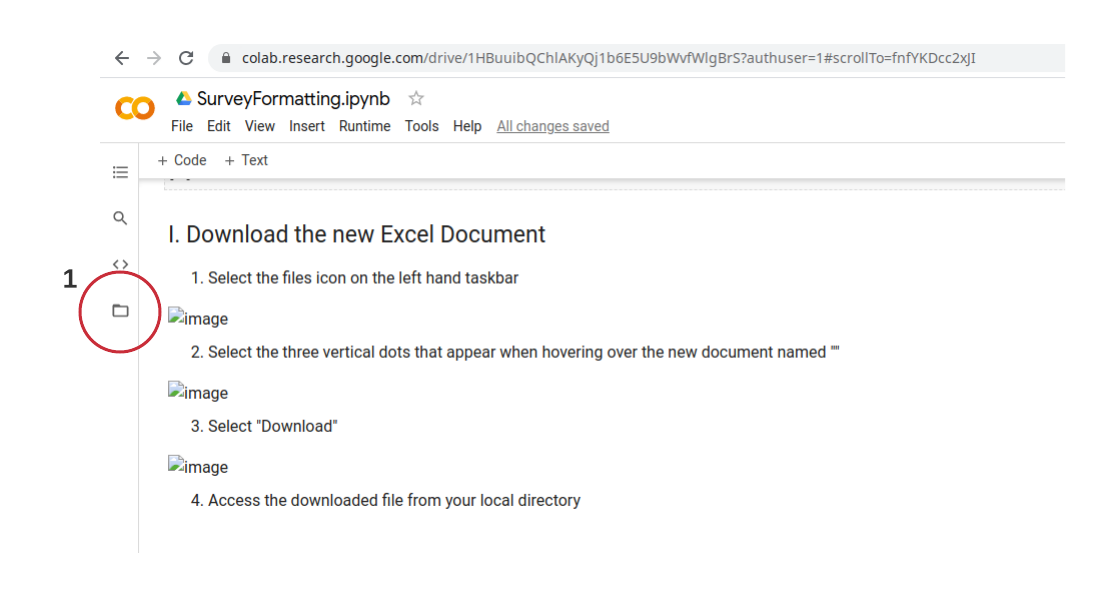

2. Select the three vertical dots that appear when hovering over the new document

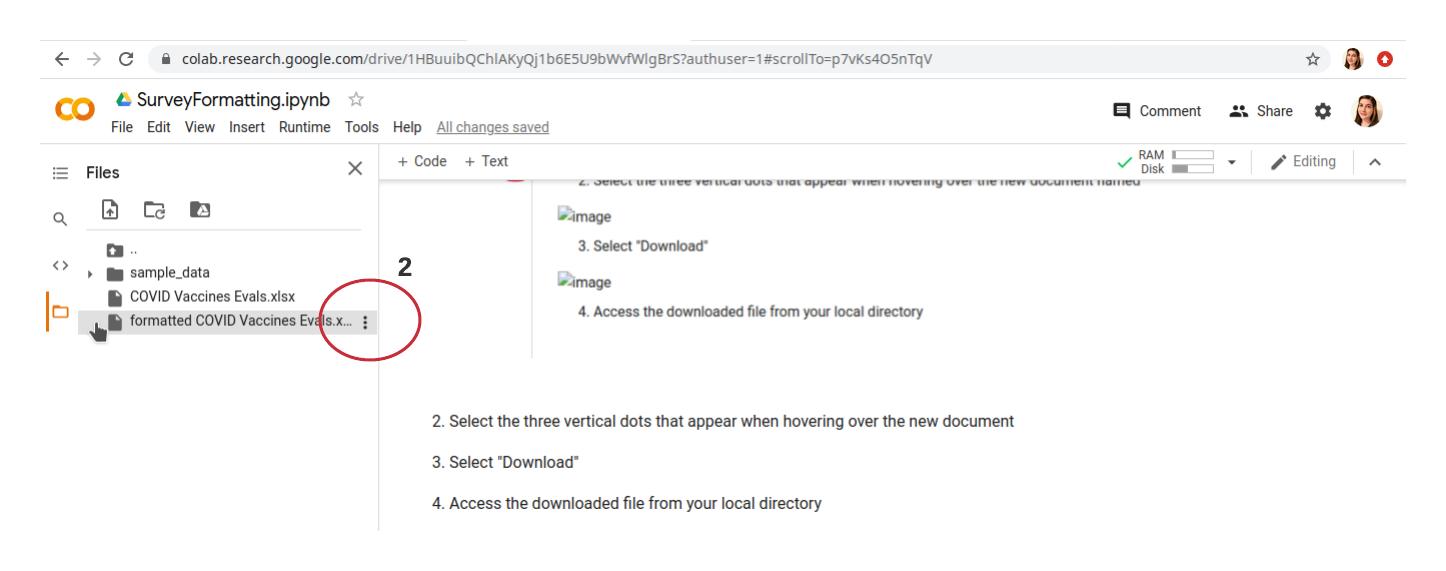

3. Select "Download"

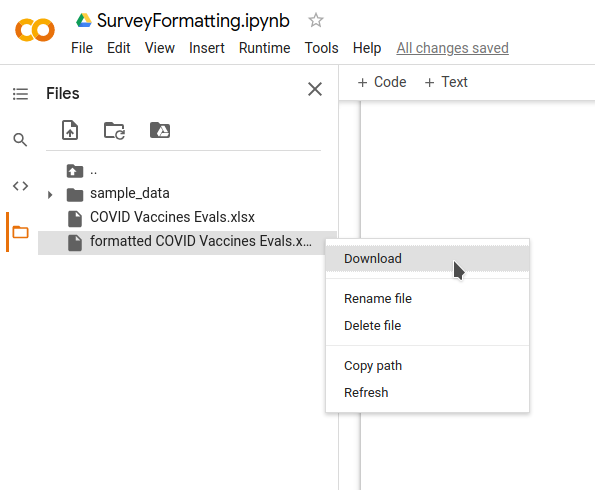

4. Access the downloaded file from your local file system